# Pre-class work 7.1: Central Limit Theorem

In [9]:
import scipy.stats as st
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

Probability of successes n*(p-.01):n*(p+.01) in n: = s
Normal approximation: = nrm


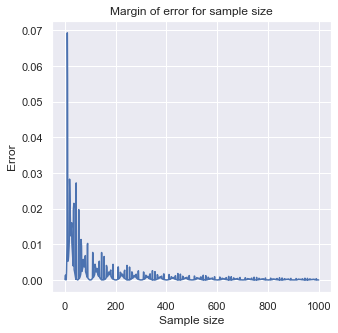

In [18]:
p = 0.1
n = np.arange(0,1000,1)
s = np.zeros(len(n))
nrm = np.zeros(len(n))

# Binomial distribution:
print('Probability of successes n*(p-.01):n*(p+.01) in n: = s')
for j in range(len(n)):
    vals = range(int(n[j]*(p-.01)), int(n[j]*(p+.01))+1)
    s[j] = sum(binom.pmf(vals, n[j], p ))

# Normal approximation of posterior:
print("Normal approximation: = nrm")
for j in range(len(n)):
    mean = n[j]*p
    std = np.sqrt(n[j]*p*(1-p))
    val = n[j]*(p+.01)
    nrm[j] = 2*(norm.cdf(val+0.5, loc = mean, scale = std)-.5)

error = (s-nrm)**2

plt.plot(n, error, 'b')
plt.title("Margin of error for sample size")
plt.xlabel("Sample size")
plt.ylabel("Error")
plt.show()
#Probability of successes n*(p-.01):n*(p+.01) in n: = s
#Normal approximation: = nrm

### Discussion

It is appropriate to use the binomial distribution here because the data pertains to a binary outcome for each candidate. From the graph above we can see that as the sample size increases, the margin of error decreases. However, this plot differs from the values in the table in the pre-class Roper reading because the margin of error at 1000 samples is close to zero, to 2%. The major sampling error are founding when the sample size is below 100.

Exception: Data must be 1-dimensional

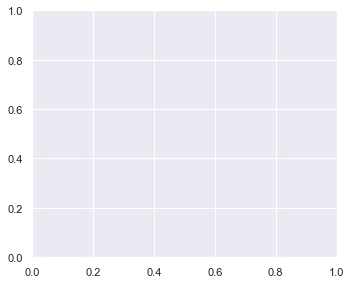

In [26]:
# Attempt to alter Keng code.
# NOTE: unsuccessful
# Approximating a normal posterior distribution:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

p = 0.1

plt.figure(1, figsize=(12, 10))
for n, pltnum in [(1000, 221), (750, 222), (500, 223), (250, 224), (100,225)]:
    # Generate some samples from our "true distribution"
    y = stats.binom.rvs(n, p, size=1000)

    # Generate our posterior density (conjugate of a binomial = beta)
    # (Of course for a more complex model we would probably 
    #  draw samples instead of using the analytical form)
    alpha = n + 1
    beta = n * y.mean() + 1.
    post = stats.beta(y, alpha, scale=1/ beta)
    
    # Plot the posterior
    plt.subplot(pltnum)
    x = np.linspace(post.ppf(0.001), post.ppf(0.999), 1000)
    pd.Series(post.pdf(x), index=x).plot(alpha=0.5, label='posterior')
    
    # Generate our normal approximation
    mu = (alpha - 1.) / beta
    sigma2 = n / beta ** 2
    norm = stats.norm(loc=mu, scale=np.sqrt(sigma2))
    
    # Plot normal approximation
    x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
    pd.Series(norm.pdf(x), index=x).plot(alpha=0.5, label='norm')
    plt.title('Normal Approx. to the Posterior')
    plt.legend(loc='best')

# Personal notes

In [1]:
# Convert a z_score to a probability using Python:

z_score = 0.31
p_values = st.norm.sf(abs(z_score))
print(p_values)

0.3782804781779807


### Code from Keng reading:

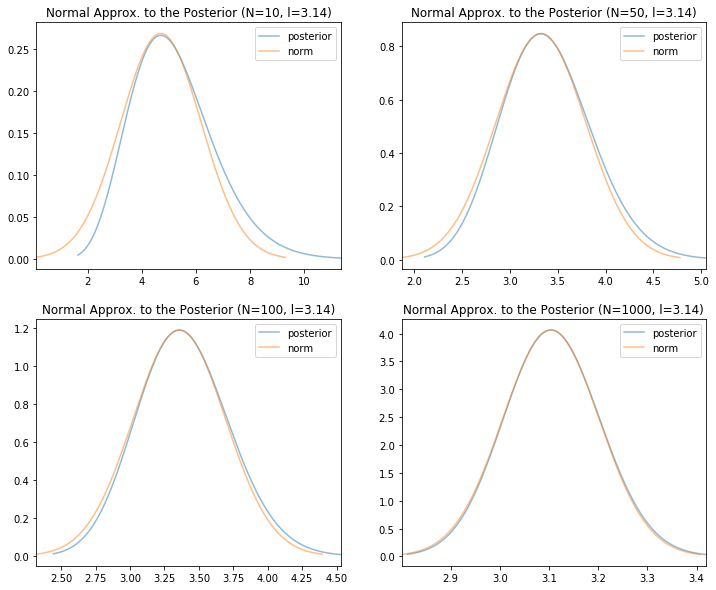

In [2]:
# Approximating a normal posterior distribution:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

lamb=3.14
plt.figure(1, figsize=(12, 10))
for n, pltnum in [(10, 221), (50, 222), (100, 223), (1000, 224)]:
    # Generate some samples from our "true distribution"
    y = stats.expon.rvs(scale=1/lamb, size=n)
    
    # Generate our posterior density
    # (Of course for a more complex model we would probably 
    #  draw samples instead of using the analytical form)
    alpha = n + 1
    beta = n * y.mean() + 1.
    post = stats.gamma(alpha, scale = 1. / beta)
    
    # Plot the posterior
    plt.subplot(pltnum)
    x = np.linspace(post.ppf(0.001), post.ppf(0.999), 1000)
    pd.Series(post.pdf(x), index=x).plot(alpha=0.5, label='posterior')
    
    # Generate our normal approximation
    mu = (alpha - 1.) / beta
    sigma2 = n / beta ** 2
    norm = stats.norm(loc=mu, scale=np.sqrt(sigma2))
    
    # Plot normal approximation
    x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
    pd.Series(norm.pdf(x), index=x).plot(alpha=0.5, label='norm')
    plt.title('Normal Approx. to the Posterior (N=%d, l=%.2f)' % (n, lamb))
    plt.legend(loc='best')